In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [2]:
%load_ext autoreload
%autoreload 2

## I. Score distributions

- Plot score distributions

In [3]:
def read_csv_using_pandas(csv_path=None):

    data = pd.read_csv(csv_path)

    print(data.shape)
    print(data.head())

    return data


def parse_pd_data(data):
    
    values = [data.values[:, c] for c in range(len(data.values[0]))]

    return values


def plot_data(values):
    
    figsize = (6, 4)
    title_fontsize, label_fontsize = 20, 15

    fig = plt.figure(figsize=figsize)
    ax = Axes3D(fig)
    ax.scatter(values[0], values[1], values[2])
    ax.set_title('Score Distributions', fontsize=title_fontsize)
    ax.set_xlabel('Circuit', fontsize=label_fontsize)
    ax.set_ylabel('Data Structure', fontsize=label_fontsize)
    ax.set_zlabel('Machine Intelligence', fontsize=label_fontsize)

    plt.show()
    return fig

In [4]:
csv_path = 'exam_scores.csv'
data = read_csv_using_pandas(csv_path)

(1000, 3)
   Circuit  DataStructure  MachineIntelligence
0       48             68                   63
1       62             81                   72
2       79             80                   78
3       76             83                   79
4       59             64                   62


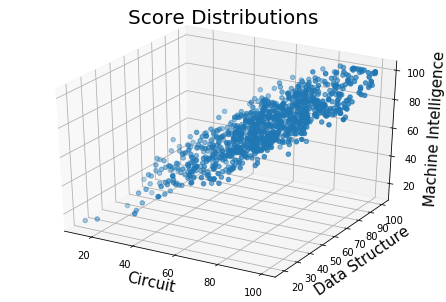

In [5]:
values = parse_pd_data(data)
_ = plot_data(values)

## II. Linear regression using gradient descent
### Linear regression using gradient descent with below conditions

> a. Learning rate = 0.0001   
> b. Number of iterations = 1,000,000    
> c. Loss function = average RSS (i.e., (1/N)*RSS where N is a total number of samples)   
> d. Initialize all weight values to 0

- Estimate regression coefficients $w_0$, $w_1$, $w_2$ for a bias, a circuit score, and a data structure score, respectively 
- Plot an average RSS over number of iterations  
- Draw a plane using estimated regression coefficients $w_0$, $w_1$, $w_2$

In [6]:
def prepare_dataset_for_linear_regression(values):

    bias = np.ones(len(values[0]))
    X = np.array([bias, values[0], values[1]]).T
    y = np.array(values[2])
    
    return X, y


class LinearRegression:

    def __init__(self, lr=0.0001, iterations=100000):
        self.lr = lr
        self.iterations = iterations
        self.average_rss_history = []

    def fit(self, X, y):
        N = len(y)
        self.w = np.zeros(X.shape[1])

        for i in range(self.iterations):
            y_predict = np.dot(X, self.w)
            average_rss = np.sum(np.power(y_predict-y, 2)) / N
            self.w -= 2*self.lr*(np.dot(X.T, (y_predict-y))) / N
            self.average_rss_history.append(average_rss)

    def predict(self, X):
        pred_y = np.dot(X, self.w)
        
        return pred_y


def plot_average_rss_history(iterations, history):
    
    figsize = (6,4)
    title_fontsize, label_fontsize = 20, 15

    fig = plt.figure(figsize=figsize)
    plt.ylim(0,100)
    plt.plot(range(iterations), history)
    plt.title('Average RSS over number of iterations', fontsize=title_fontsize)
    plt.xlabel('Iterations', fontsize=label_fontsize)
    plt.ylabel('Average RSS', fontsize=label_fontsize)
    
    plt.show()
    return fig


def plot_data_with_wireframe(values, w, wireframe_color='red'):

    def make_meshgrids(x, y, num=10):
        x_linspace, y_linspace = np.linspace(min(x), max(x), 10), np.linspace(min(y), max(y), 10)
        x_grid, y_grid = np.meshgrid(x_linspace, y_linspace)
        
        return x_grid, y_grid
    
    def ZFunc(data, *w):       
        w0, w1, w2 = w
        
        return w0 + w1*data[0] + w2*data[1]

    x_grid, y_grid = make_meshgrids(values[0], values[1])
    z_grid = ZFunc(np.array([x_grid, y_grid]), *w)
    

    figsize = (6,4)
    title_fontsize, label_fontsize = 20, 15

    fig = plt.figure(figsize=figsize)
    ax = Axes3D(fig)
    ax.scatter(values[0], values[1], values[2])
    ax.plot_wireframe(x_grid, y_grid, z_grid, color=wireframe_color)
    ax.set_title('Score Distributions', fontsize=title_fontsize)
    ax.set_xlabel('Circuit', fontsize=label_fontsize)
    ax.set_ylabel('Data Structure', fontsize=label_fontsize)
    ax.set_zlabel('Machine Intelligence', fontsize=label_fontsize)

    plt.show()
    return fig

In [7]:
X, y = prepare_dataset_for_linear_regression(values)
lr, iterations = 0.0001, 1000000

model = LinearRegression(lr, iterations)
model.fit(X, y)

print(model.w)

[-1.46196898  0.09600001  0.91049558]


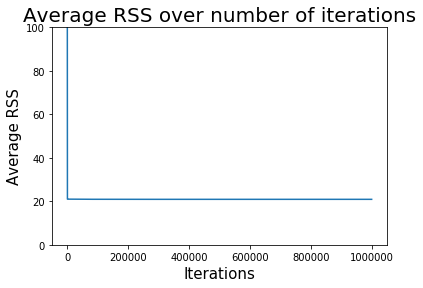

In [8]:
_ = plot_average_rss_history(iterations, model.average_rss_history)

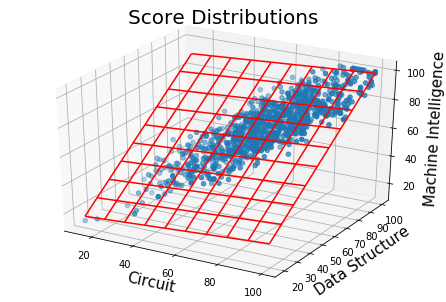

In [9]:
_ = plot_data_with_wireframe(values, model.w, 'red')

## III. Linear regression without iterations
### Linear regression without iterations (closed form solution)

- Estimate weights $w_0$, $w_1$, $w_2$ for a bias, a circuit score, and a data structure score, respectively
- Draw a plane using estimated regression coefficients $w_0$, $w_1$, $w_2$

In [10]:
def get_closed_form_solution(X, y):

    w = np.zeros(X.shape[1])
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

    return w

In [11]:
w_closed = get_closed_form_solution(X, y)
print(w_closed)

[-1.46243738  0.09600221  0.91049989]


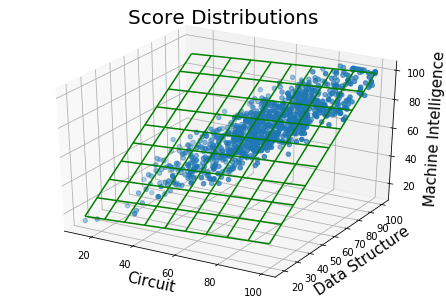

In [12]:
_ = plot_data_with_wireframe(values, w_closed, 'green')